In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

In [87]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn. metrics import mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Load the California Housing Dataset from seaborn
california = fetch_california_housing()
# Convert the data to a pandas dataframe
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
# Add the target variable to the dataframe
california_df[ 'MedHouseVal'] = california.target
# Print the first 5 rows of the dataframe california_df.head()

In [90]:
df=california_df.copy()

In [91]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [93]:
df.shape

(20640, 9)

In [94]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [95]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [97]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


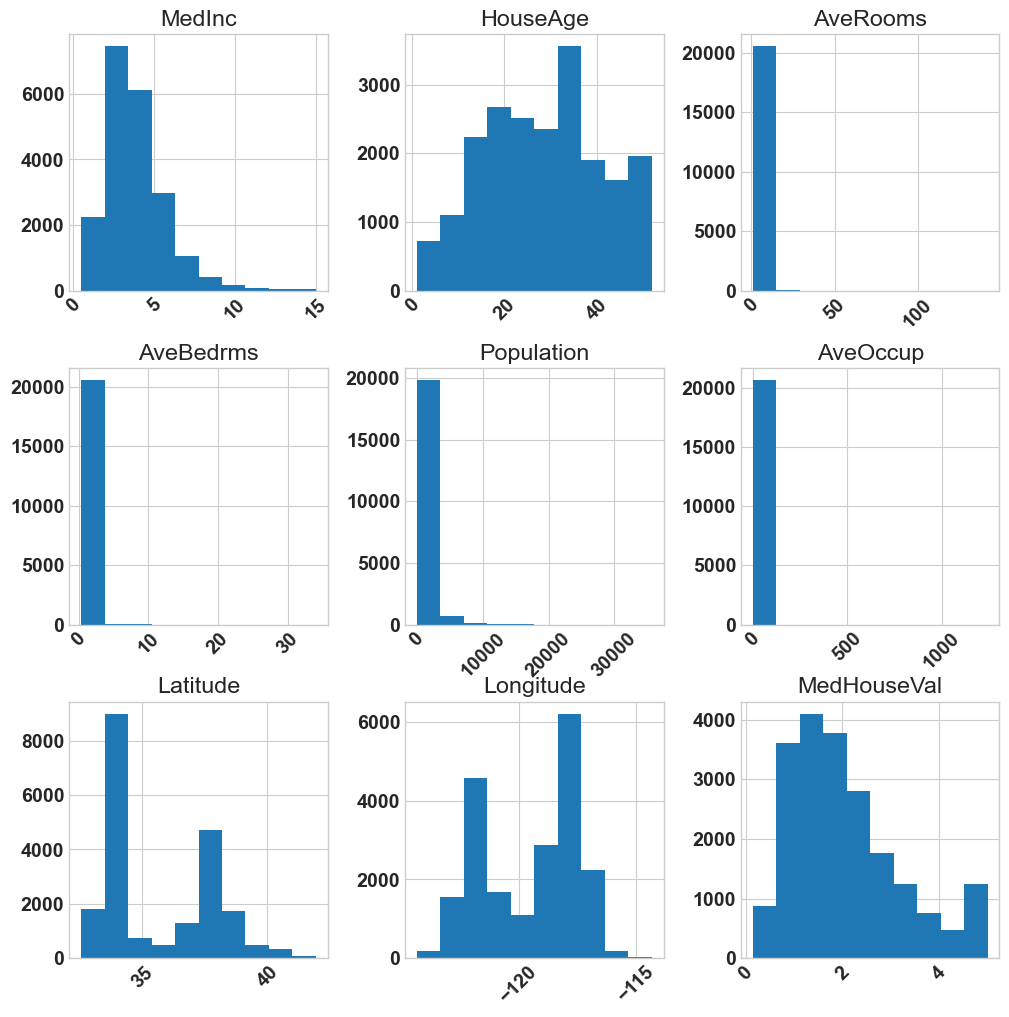

In [98]:
df.hist(figsize=(12,12), xrot=45)
plt.show()

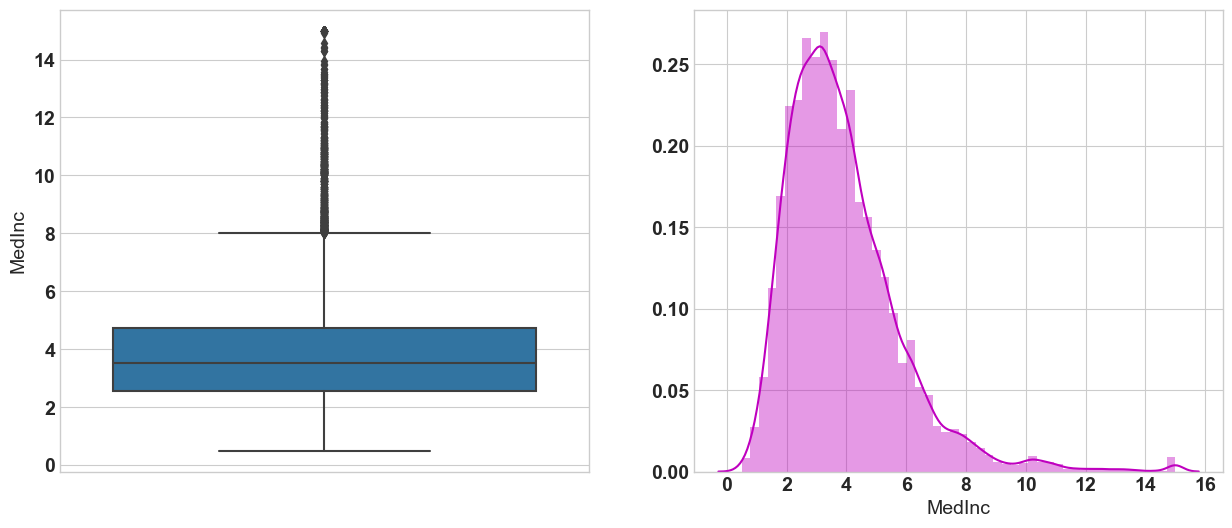

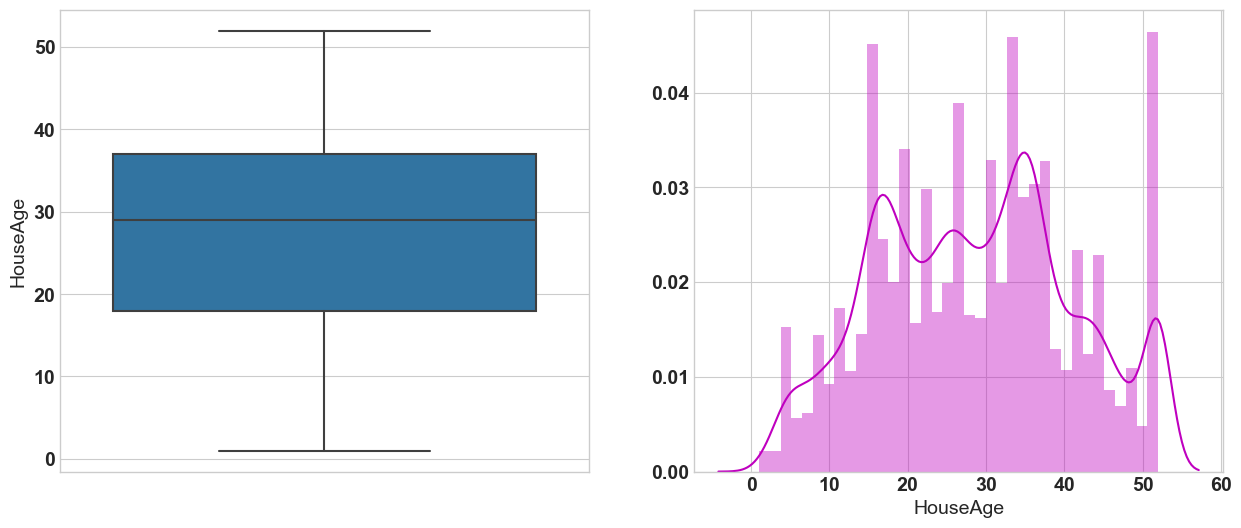

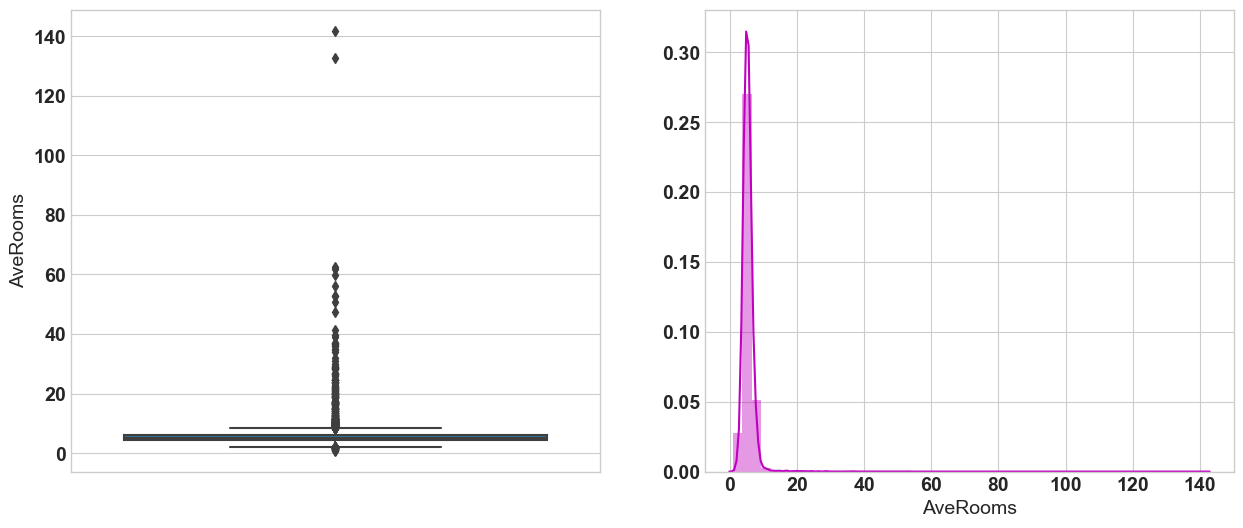

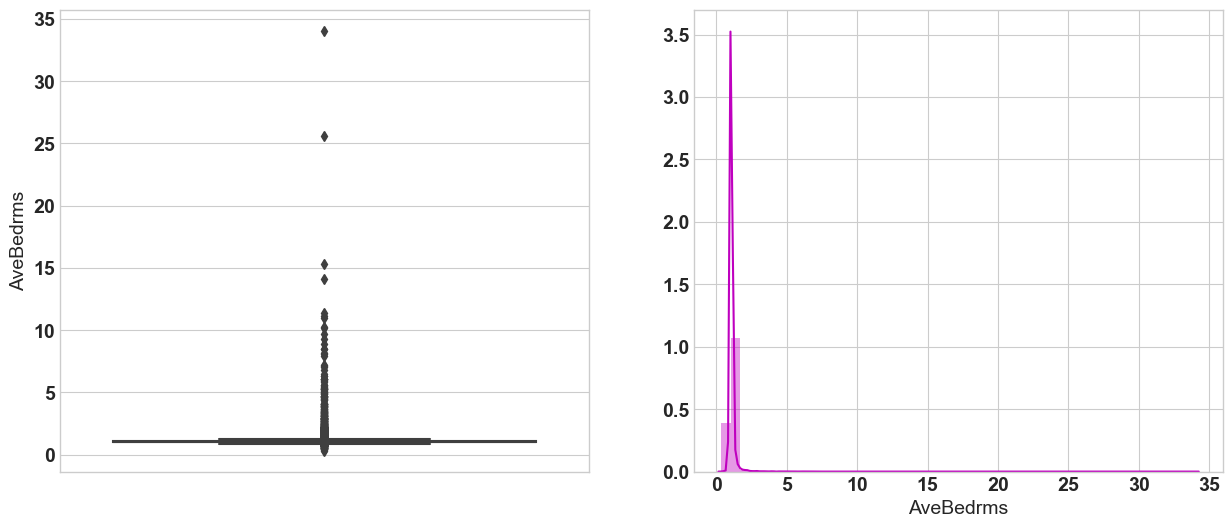

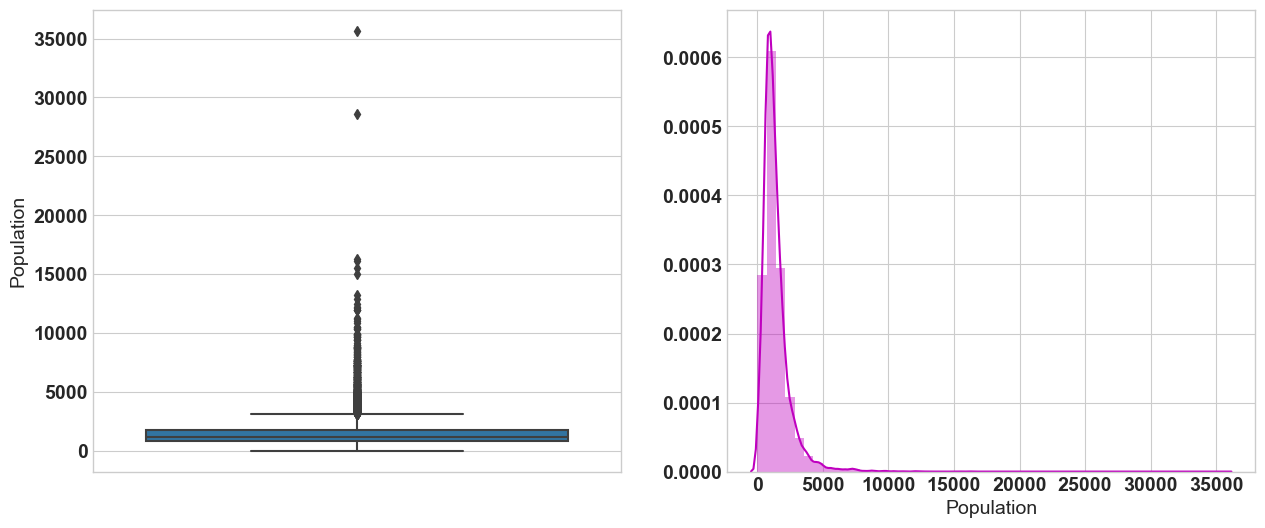

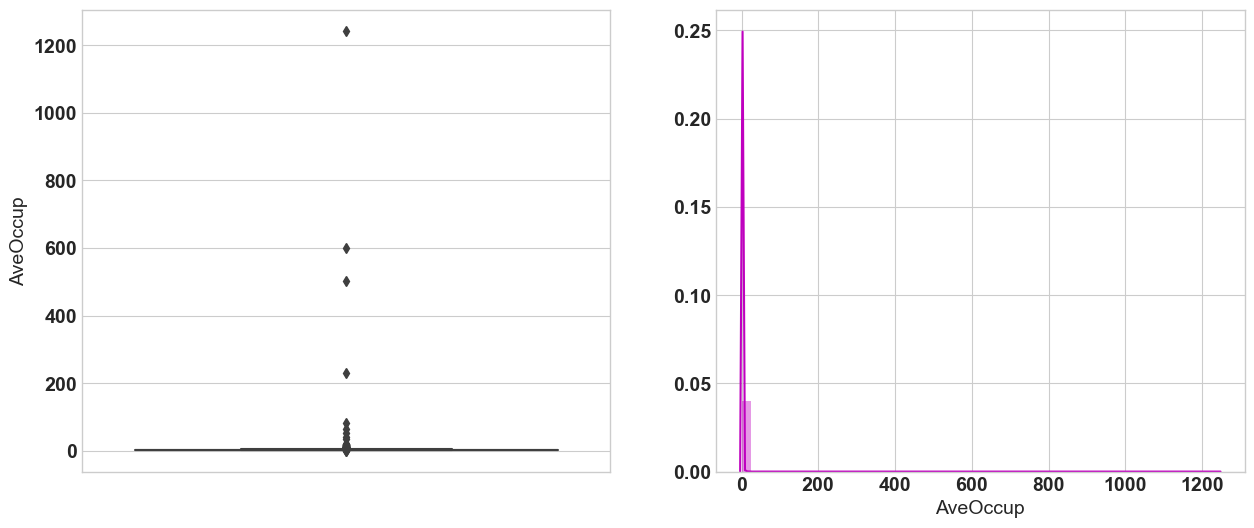

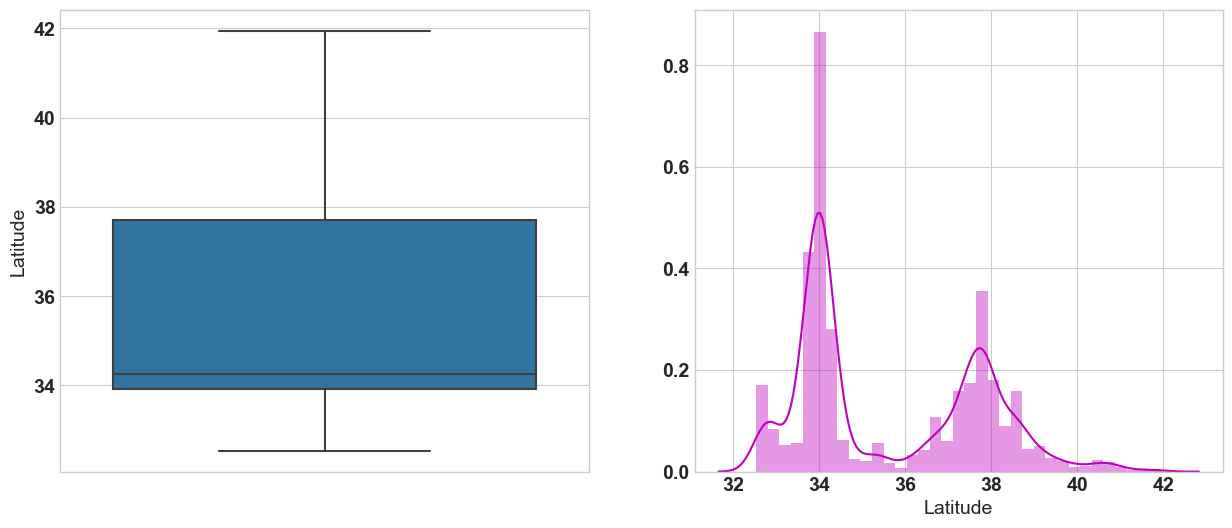

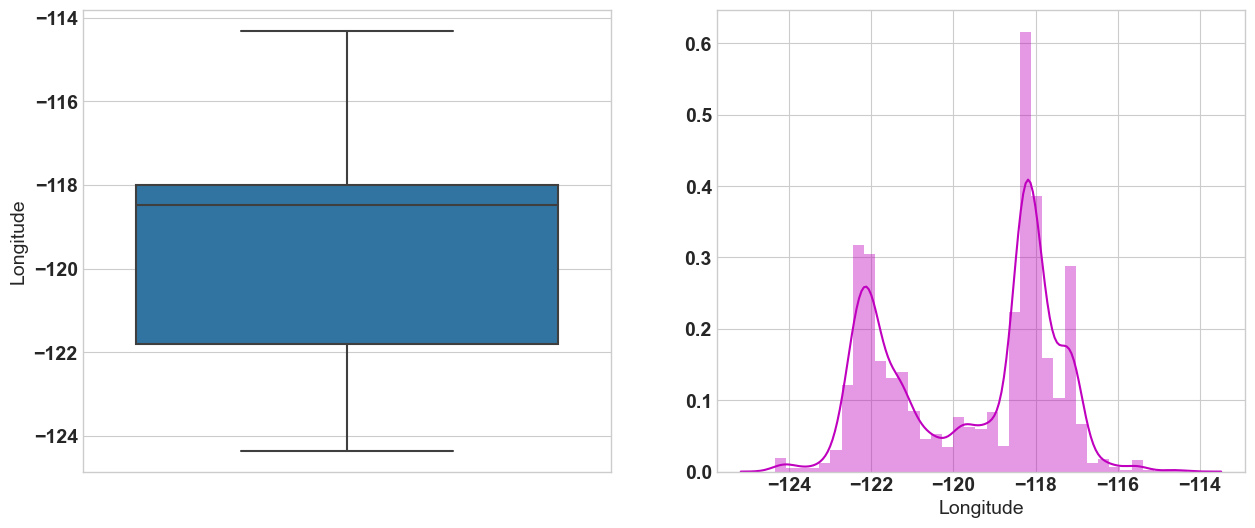

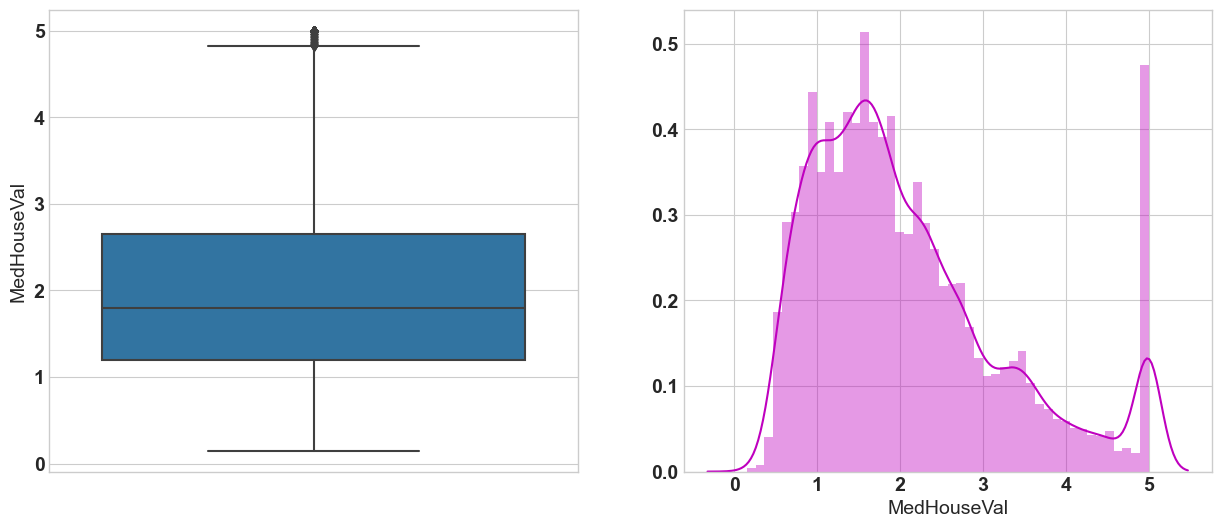

In [99]:
numeric_features = df.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


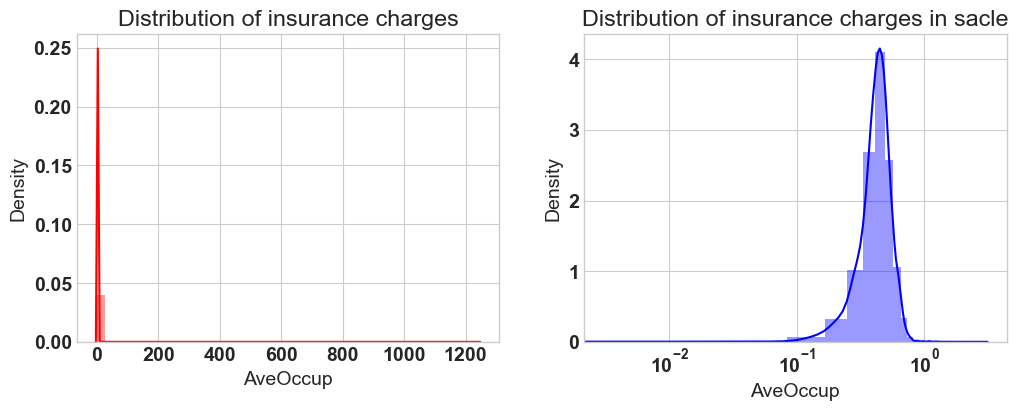

In [101]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['AveOccup'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['AveOccup']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');
     

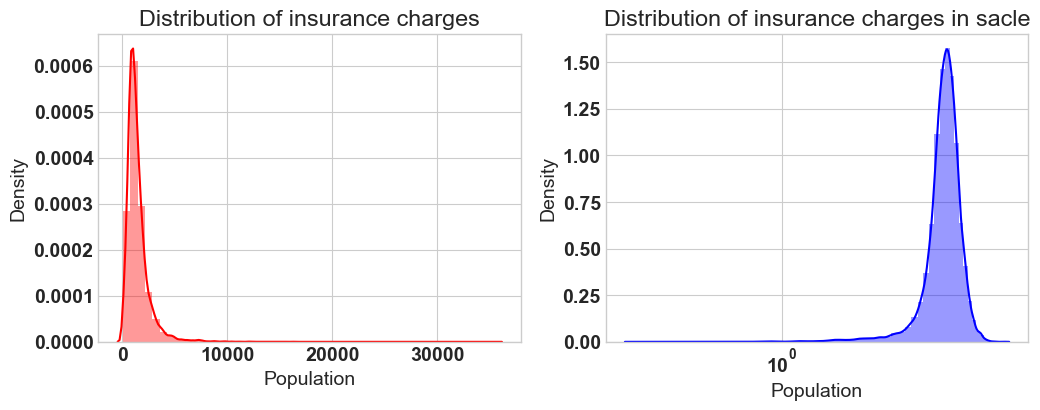

In [102]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Population'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['Population']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');

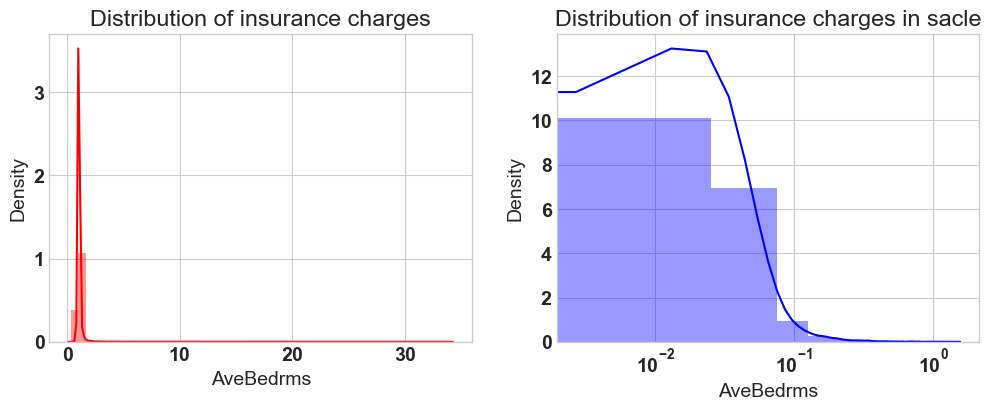

In [103]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['AveBedrms'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['AveBedrms']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');

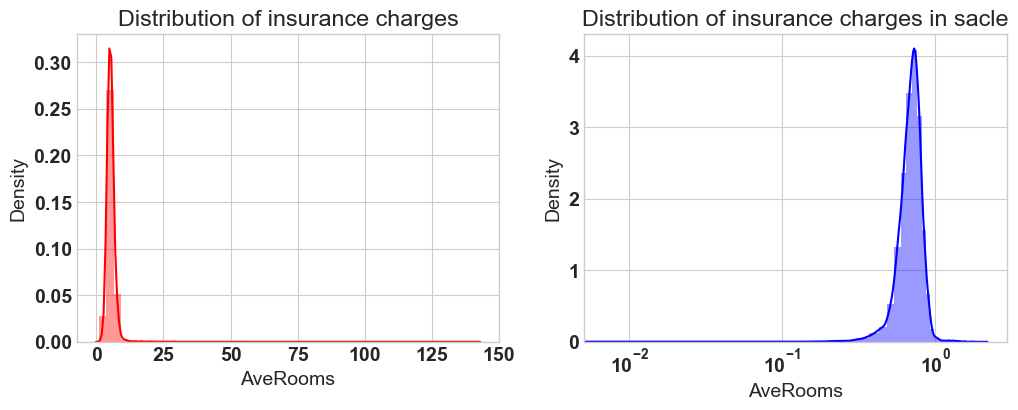

In [104]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['AveRooms'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['AveRooms']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');

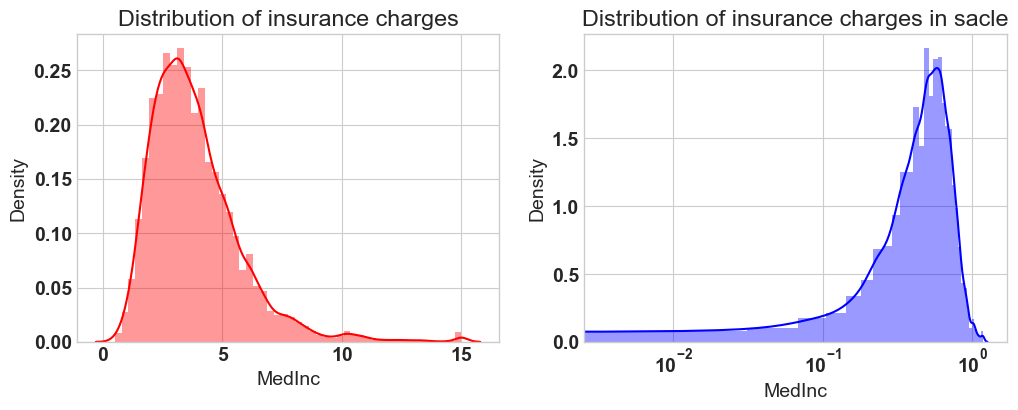

In [105]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['MedInc'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['MedInc']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in sacle')
ax.set_xscale('log');

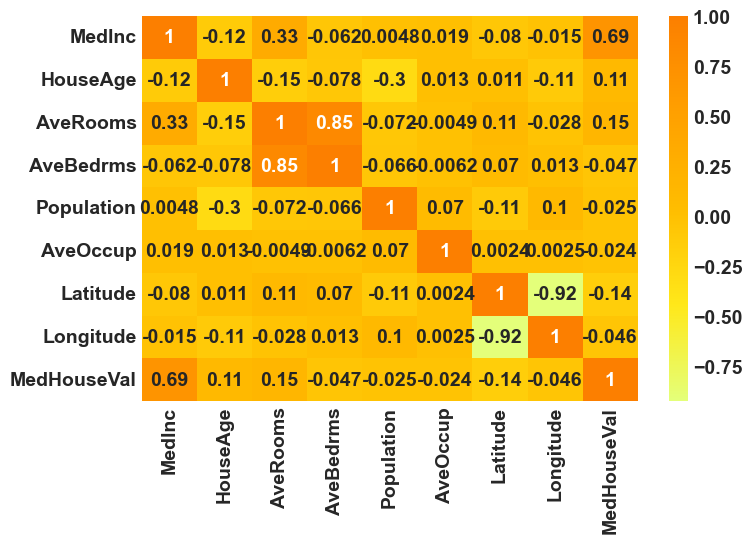

In [106]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


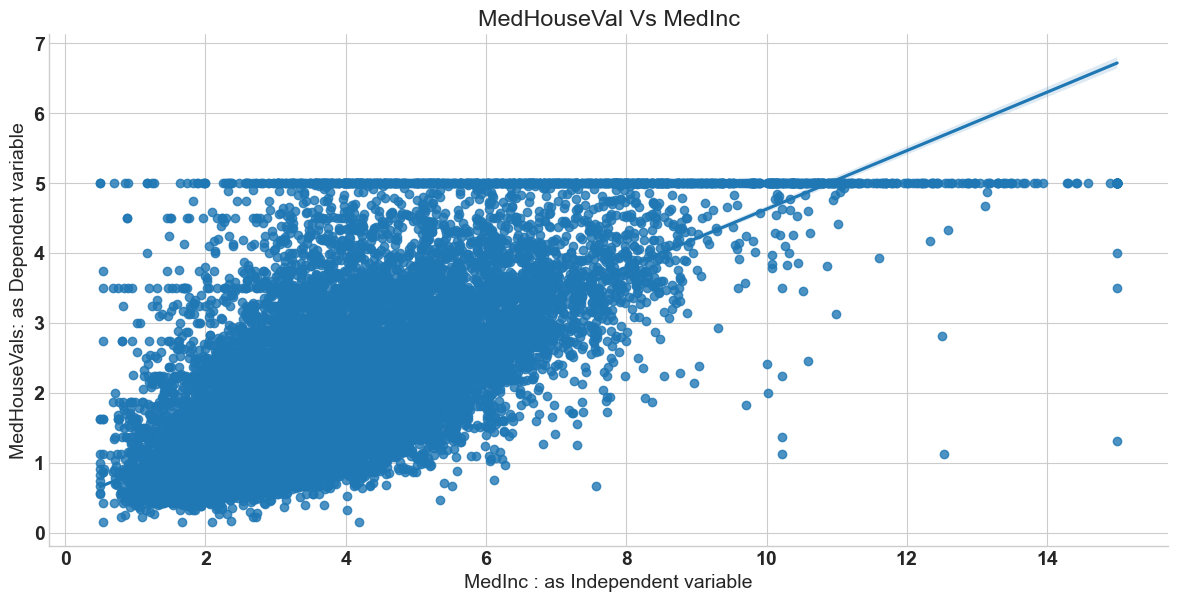

In [108]:
sns.lmplot(x='MedInc',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('MedInc : as Independent variable')
plt.ylabel('MedHouseVals: as Dependent variable')
plt.title('MedHouseVal Vs MedInc');

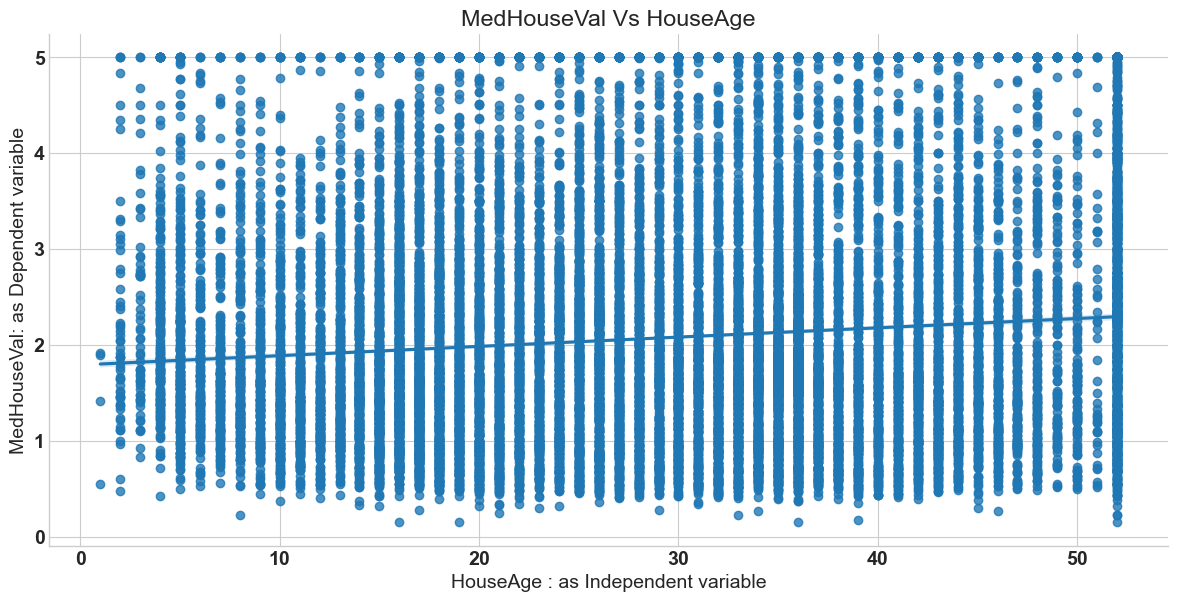

In [109]:
sns.lmplot(x='HouseAge',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('HouseAge : as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal Vs HouseAge');

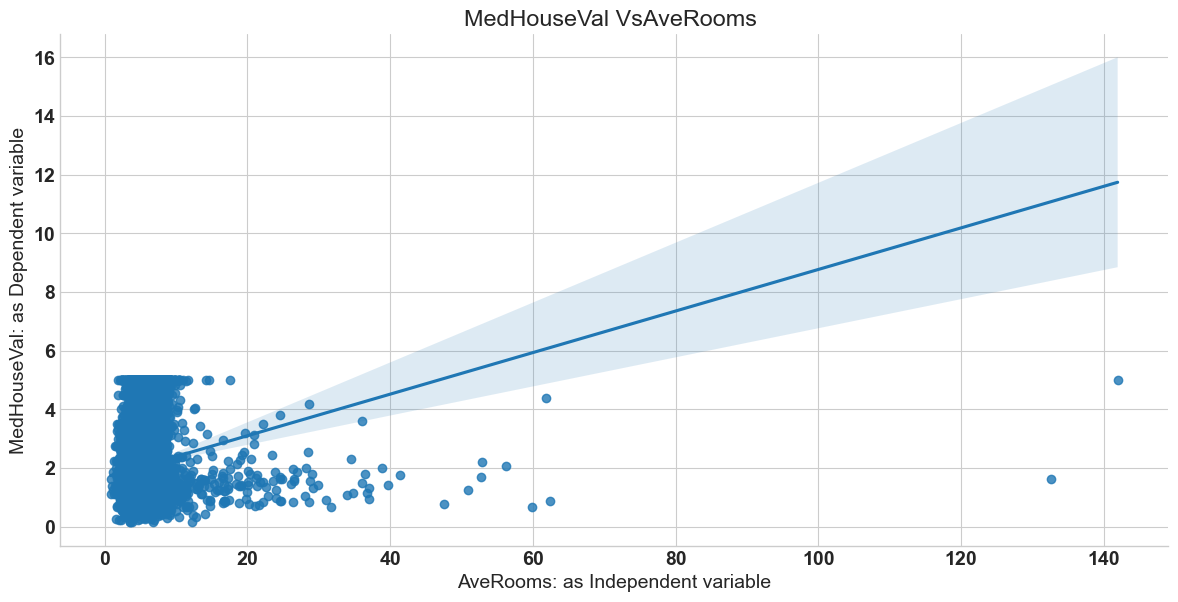

In [110]:
sns.lmplot(x='AveRooms',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('AveRooms: as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal VsAveRooms ');

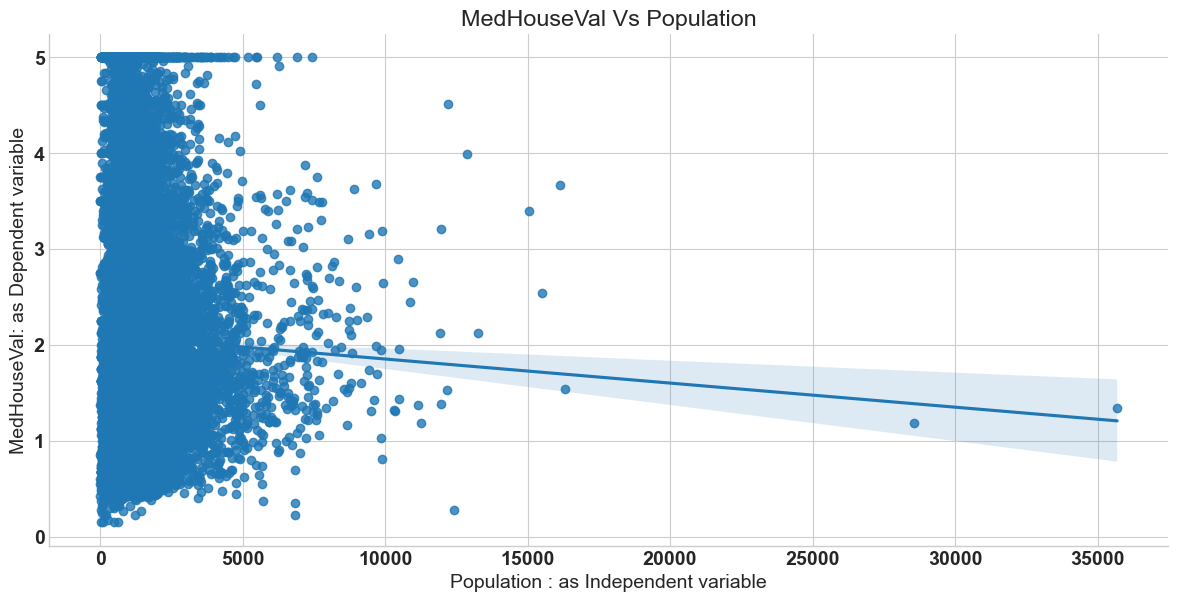

In [111]:
sns.lmplot(x='Population',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('Population : as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal Vs Population');

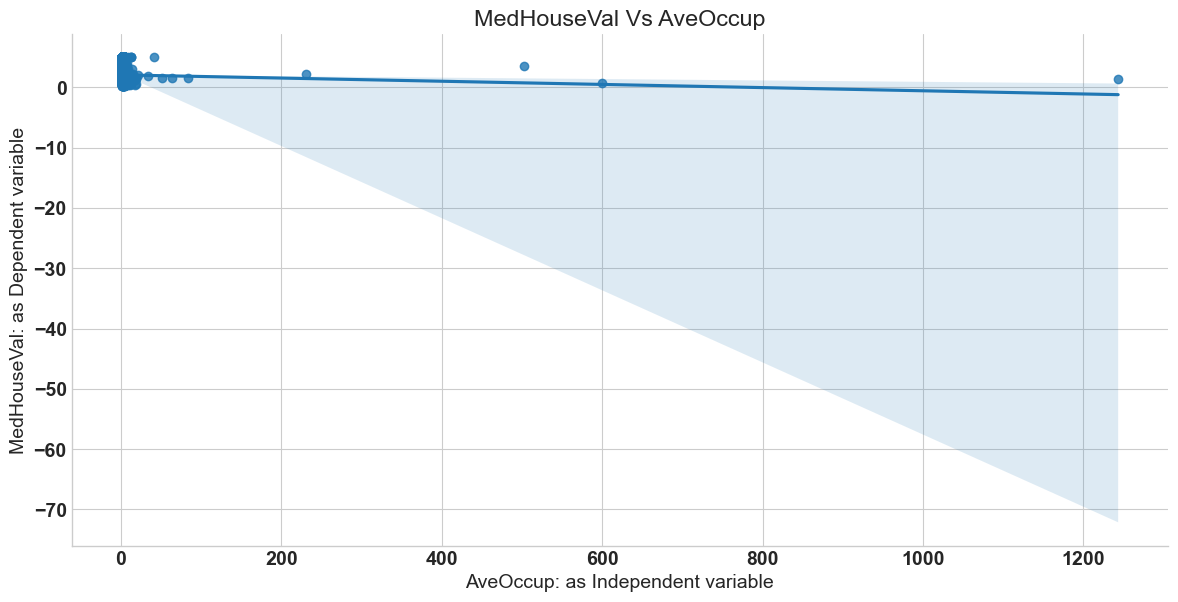

In [112]:
sns.lmplot(x='AveOccup',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('AveOccup: as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal Vs AveOccup');

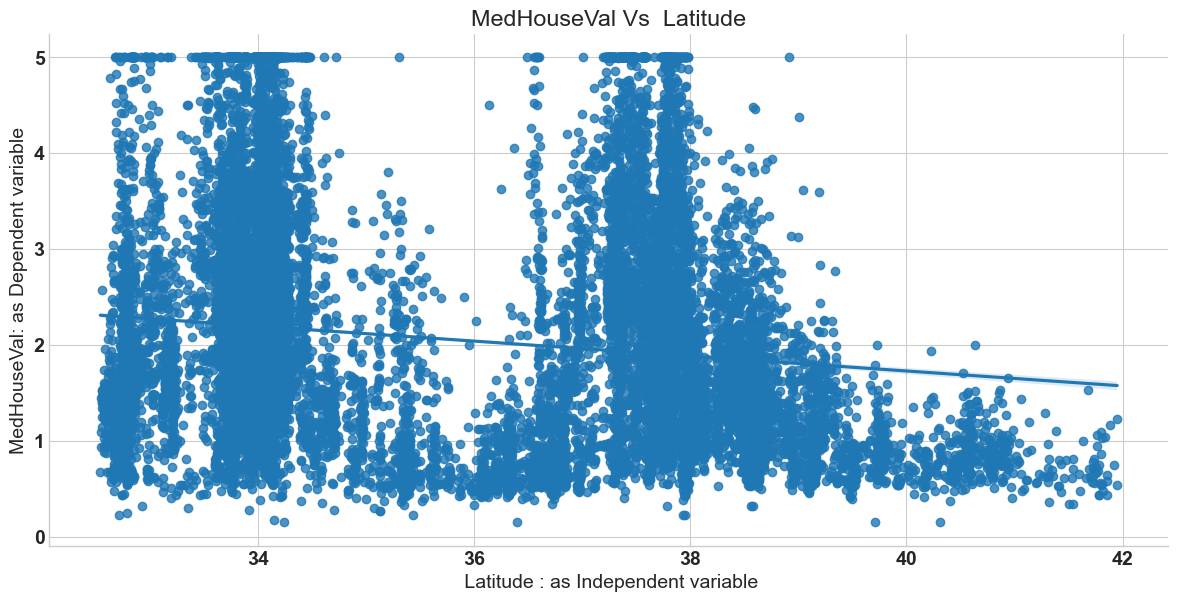

In [113]:
sns.lmplot(x='Latitude',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel(' Latitude : as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal Vs  Latitude');

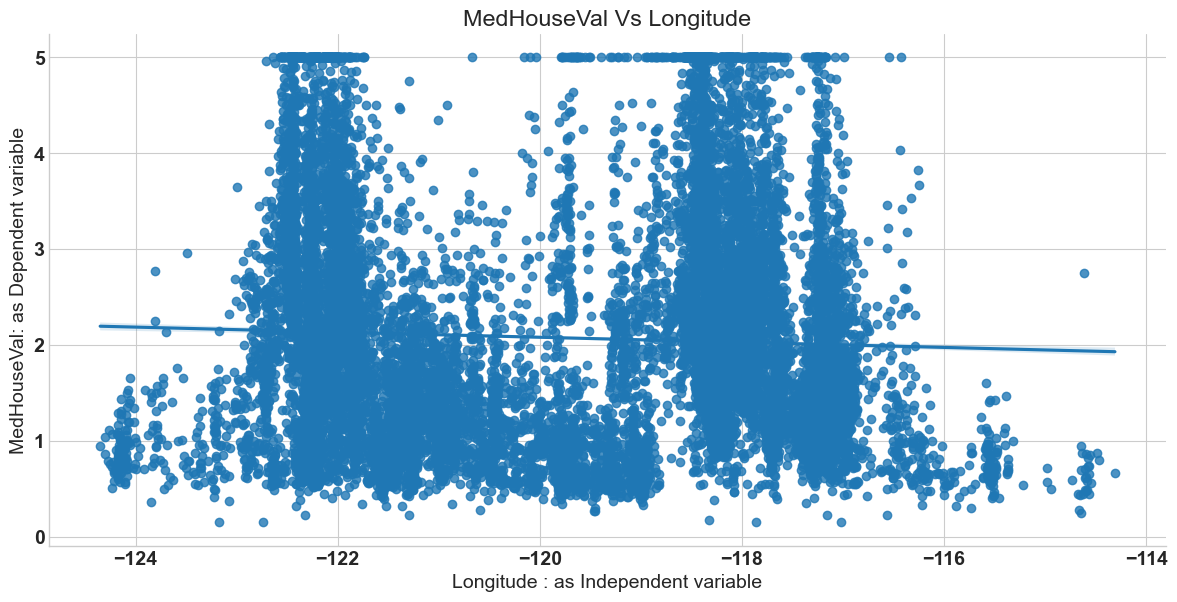

In [114]:
sns.lmplot(x='Longitude',y='MedHouseVal',data=df,aspect=2,height=6)
plt.xlabel('Longitude : as Independent variable')
plt.ylabel('MedHouseVal: as Dependent variable')
plt.title('MedHouseVal Vs Longitude');

In [115]:
#Importing required libraries.
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
#As we see there is a difference in VIF values as we removie BMI attribute.
# Checking Multicollinearity with VIF
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(data[[i for i in data.describe().columns if i not in ['MedHouseVal']]])

In [ ]:
df.head()

In [ ]:
#Train-Test split and training of model with training data.
X = df.drop(["MedHouseVal"],axis=1)
y = df.MedHouseVal
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
y_pred 

In [ ]:
MSE_train = mean_squared_error(y_train, y_pred)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred)
print(f'R2_Score= {R2_Score_train}')

In [117]:
X = df.drop(["MedHouseVal"],axis=1)
y = df.MedHouseVal
    

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.20)

In [118]:
X = df.drop(["MedHouseVal"],axis=1)
y = df.MedHouseVal
    

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
     

y_pred_test
     

array([2.28110738, 2.79009128, 1.90332794, ..., 0.8418697 , 2.7984953 ,
       2.21779325])

In [119]:
MSE_test = mean_squared_error(y_test,y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 0.5289841670367214
RMSE= 0.7273129773603118
R2_Score= 0.5943232652466199


In [120]:
# Assumptions for Linear Regression
# 1. Linearity

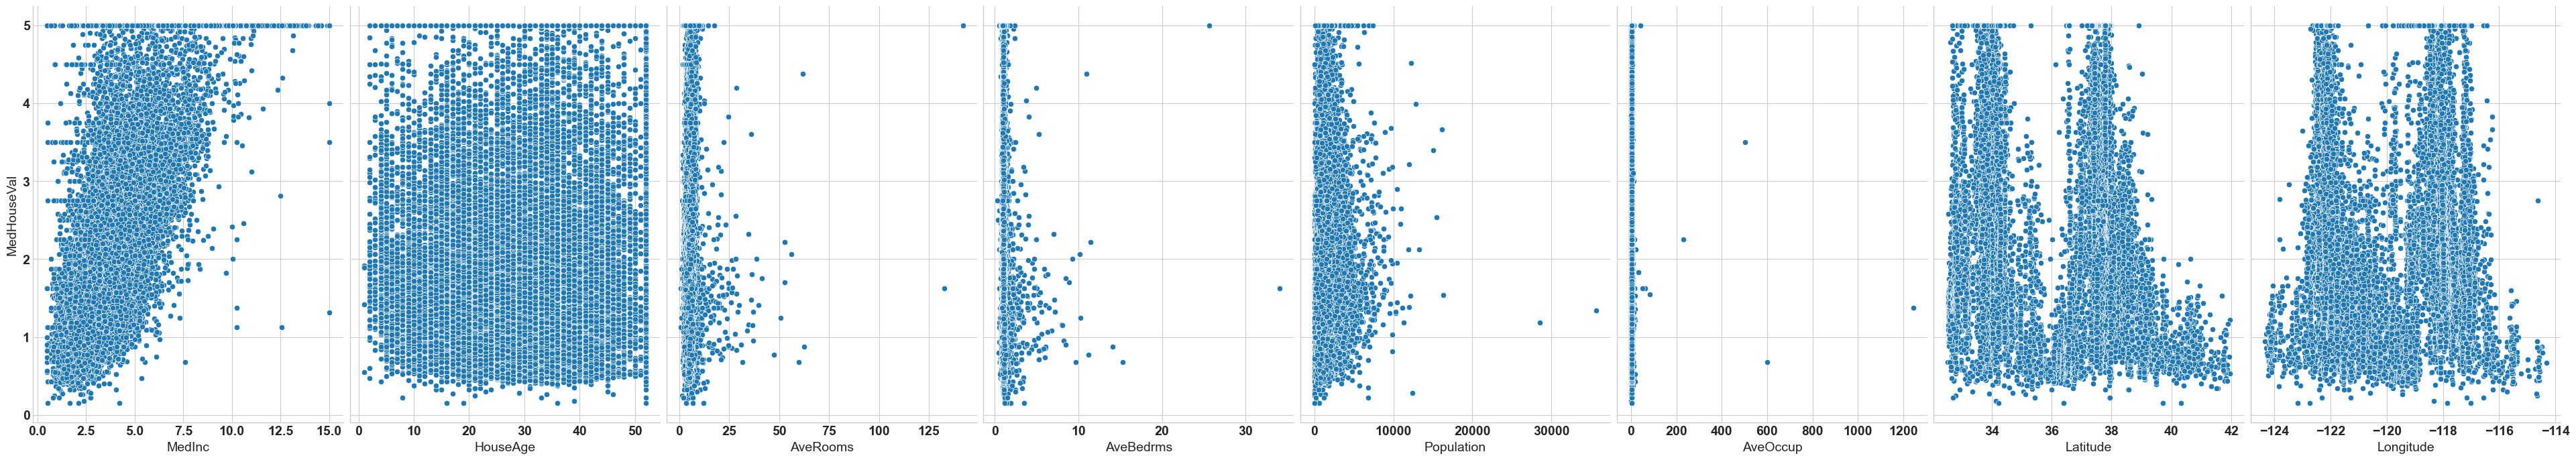

In [121]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df, x_vars=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'], y_vars='MedHouseVal', size=7, aspect=0.7)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [123]:
df3=df.copy()

In [124]:
pip install statsmodels

In [125]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df3[[i for i in df3.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [126]:
df4=df3.copy()

In [86]:
df4.drop(['Longitude'], axis=1, inplace=True)

KeyError: "['Longitude'] not found in axis"

In [66]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df4[[i for i in df4.describe().columns if i not in ['MedHouseVal']]])

,variables,VIF
0,MedInc,3.365691
1,HouseAge,2.902377
2,Population,2.075019
3,AveOccup,1.094509


12069    3.274099
15925   -0.185439
11162   -0.239646
4904    -0.194820
4683     0.029298
           ...   
13123   -0.319119
19648    0.242498
9845     0.384093
10799    1.751487
2732     0.221663
Name: MedHouseVal, Length: 16512, dtype: float64


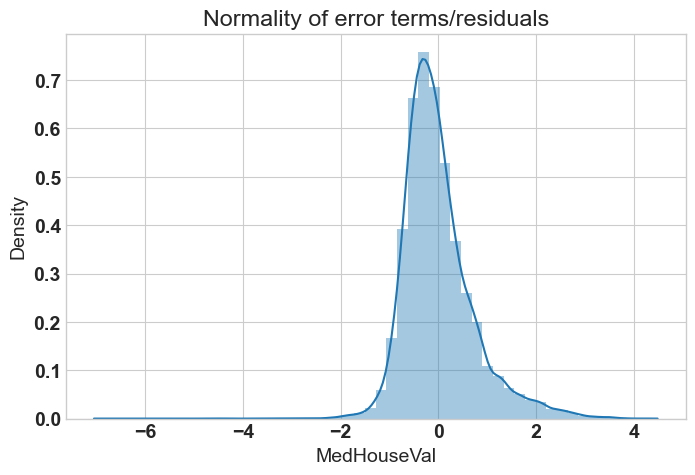

In [73]:
# Residual calculation for train data Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals = y_train - model.predict(X_train)
print(residuals)


p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

14740   -0.912107
10101   -0.377091
20566    0.103672
2670    -0.292603
15709    1.651476
           ...   
6655     0.078247
3505    -0.363188
1919     0.444130
1450    -0.203495
4148    -0.541793
Name: MedHouseVal, Length: 4128, dtype: float64


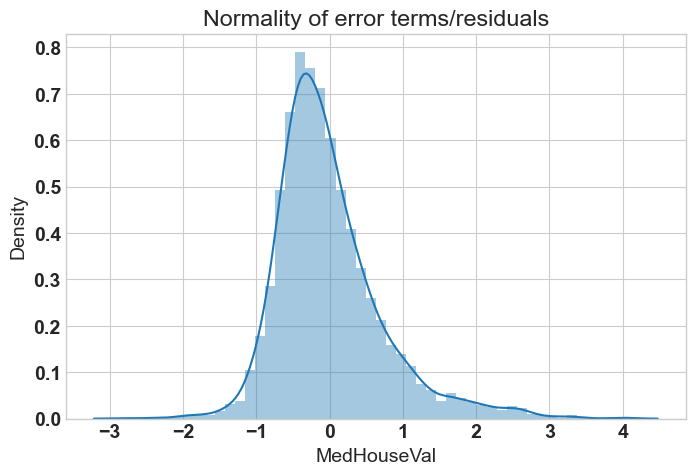

In [76]:
# Residual calculation for train data Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals1 = y_test - model.predict(X_test)
print(residuals1)


p = sns.distplot(residuals1,kde=True)
p = plt.title('Normality of error terms/residuals')

In [77]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [67]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
